#Get Data From Gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
cd /content/drive/MyDrive/Colab Notebooks/PriceOptim/PriceOptimExport

/content/drive/MyDrive/Colab Notebooks/PriceOptim/PriceOptimExport


In [41]:
ls

 Hasil/                                    OptimizedPrice_new_exportJson.ipynb
'hasil fix'/                               UK_SalesTransaction_cleaned.csv
 OptimizedPrice_new_exportJson_FIX.ipynb


In [42]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
%matplotlib inline
import pandas as pd
# url='https://drive.google.com/file/d/1f8_vU8h1NsCiroU1ZcRt119L2WEEcw6V/view?usp=sharing'
# url='https://drive.google.com/uc?id=' + url.split('/')[-2]
# url = 'UK_SalesTransaction_v.4a.csv'
# data = pd.read_csv(url)
# print(data.shape)

In [ ]:
# Data Cleaning
def data_cleaning(): 

    # Read the data
    data = pd.read_csv(url)
    
    # 1-Dealing with price data: Membulatkan (round) harga 
    data.Price = round(data.Price, 2)
    
    # 2-Dealing with CustomerNo data: Find CustomerNo data with missing value
    zero_customer_no = data.where(data.CustomerNo == 0.0).dropna(axis=0)
    # Remove the zero CustomerNo data
    data.drop(zero_customer_no.index, axis=0, inplace=True)
    data.index = range(len(data))
    with pd.option_context('mode.use_inf_as_na', True):
        data = data.dropna(axis=0)
    data.index = range(len(data))
    
    # 3-Dealing with data in Quantity with Negative values related to cancelled transactions.
    negative_quantity = data.where(data.Quantity <= 0.0).dropna(axis=0)
    # Remove the negative quantity data
    data.drop(negative_quantity.index, axis=0, inplace=True)
    data.index = range(len(data))
    with pd.option_context('mode.use_inf_as_na', True):
        data = data.dropna(axis=0)
    data.index = range(len(data))
    
    #4-Dealing with ProductNo datatypes
    into_string_ProductNo=data["ProductNo"].astype(str)
    data.index = range(len(data))
    with pd.option_context('mode.use_inf_as_na', True):
        data = data.dropna(axis=0)
    data.index = range(len(data))
    
    # Write the processed data
    data.to_csv('UK_SalesTransaction_cleaned.csv', index=False, chunksize=1000)

data_cleaning()

#Get Data From Dataset

In [104]:
data = pd.read_csv("UK_SalesTransaction_cleaned.csv")
data.shape
data.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [105]:
## dapatin nilai semua no. produk
product = data["ProductNo"].unique()

product_no = product[:10] # ngambil 10 no.product
# product_no = product # ngambil semua no.product
print(product_no)

['22485' '22596' '23235' '23272' '23239' '21705' '22118' '22119' '22217'
 '22216']


In [160]:
product_no.shape

(10,)

In [107]:
data_product = {}
def product():
  a = "data_"
  #Read the data
  data = pd.read_csv("UK_SalesTransaction_cleaned.csv")
  # looping setiap no.produk
  for i in product_no:
    no_data = data[data["ProductNo"].str.contains(str(i)) == True]
    # nyimpan dataframe ke variable baru sesuai no.produknya
    data_product.update({a+str(i):no_data})
    # jadinya data data_22485, data_22596, dan sebagainya
product()

In [108]:
initial_price_dict = {}
for item, data in data_product.items():
  a = "initial_price_"
  min_price = data.Price.min()
  max_price = data.Price.max()
  # cost = round(0.8 * min_price, 2) #diasumsikan cost didapat dari 80% dari harga jual terendah
  initial_price = [min_price, max_price]
  initial_price_dict.update({a+str(item):initial_price})
  
initial_price_dict

{'initial_price_data_21705': [5.97, 13.69],
 'initial_price_data_22118': [6.04, 22.42],
 'initial_price_data_22119': [6.04, 24.73],
 'initial_price_data_22216': [6.13, 11.95],
 'initial_price_data_22217': [5.97, 12.82],
 'initial_price_data_22485': [6.04, 36.38],
 'initial_price_data_22596': [5.97, 13.27],
 'initial_price_data_23235': [6.04, 16.18],
 'initial_price_data_23239': [5.97, 18.75],
 'initial_price_data_23272': [5.97, 13.62]}

In [ ]:
data_coef

In [ ]:
print(simpan_nama_unik[0])
simpan_nama_unik

#Train To Json

In [48]:
# fit OLS model fix 1
# data_all = {}
data_coef = []
simpan_nama_unik = []
for item, data in data_product.items():
  # data_product['data_22485'].take([0])
  simpan_unik = data_product[item].Price.unique()
  nama_unik = data_product[item].ProductName.unique()
  model = ols("Quantity ~ Price", data=data_product[item]).fit() 
  # print model summary
  no = data_product[item]
  simpan_nama_unik.append('Product')
  data_coef.append([item.replace('data_', ''), nama_unik[0], model.params['Intercept'], model.params['Price'], no.Price.min(), no.Price.max()])
  # for data in data_product[item]:
data_coef = pd.DataFrame(data_coef, columns=["ProductNo","ProductName","Intercept_Coef","Elasticity_Coef","Min_Price","Max_Price"])
# data_coef = data_coef.drop_duplicates(subset=["Price"], keep="first")
# data_all.update({item:data_coef})
# simpan = data_coef.to_json('export.json', orient='index')
simpan = data_coef.to_json('export.json', orient='records')
print(simpan)


None


In [49]:
ls

 export.json   OptimizedPrice_new_exportJson_FIX.ipynb
 Hasil/        OptimizedPrice_new_exportJson.ipynb
'hasil fix'/   UK_SalesTransaction_cleaned.csv


#Price Optim

In [110]:
def number_range(start, end, intv):
    diff = (end  - start ) / intv
    for i in range(intv):
      yield (round(start + diff * i,2))
    yield end

In [ ]:
# for item, data in data_product['data_22485']:
for item, data in data_product.items():
  sns.lmplot(x = "Price", y = "Quantity", data = data_product[item], fit_reg = True, size = 4)

In [ ]:
model.params['Intercept']

31.16451985868588

In [159]:
# a range of diffferent prices to find the optimum one
# hasil_profit = []
# simpan_profit = []
#initialize Dataframe
simpan_profit = pd.DataFrame({
    'max_profit':[],
    'max_price_profit':[],
})
save_profit = []
profit = pd.DataFrame({"Price": [], "Revenue": []})
# for item, data in data_product.items():
for item, data in data_product.items():
  min_price = data.Price.min()
  max_price = data.Price.max()
  Price = []
  Price = list(number_range(min_price, max_price, 10))
  Revenue = []
  # assuming a fixed cost
  cost = 20/100*min_price
  # model = ols("Quantity ~ Price", data=data_product[item]).fit()
  for i in Price:
    # print(i)
    quantity_demanded = model.params['Intercept'] - model.params['Price'] * i
    Revenue.append((i-cost) * quantity_demanded)
    # print("selesai")   
  # profit function
  # create data frame of price and revenue
  profit = pd.DataFrame({"Price": Price, "Revenue": Revenue})
  #plot revenue against price
  save_profit.append(profit)
  print(round(profit.iloc[profit['Revenue'].idxmax()],2))
d = 0
# for data in save_profit.Revenue.items():
#   # print(data[1])
#   if(save_profit.Revenue.max() == data[1]):
#    simpan_profit=simpan_profit.append({
#     'max_profit':round(profit.Revenue.max(),2),    
#     'max_price_profit':round(profit.Price[d],2),    
#     }, ignore_index=True)
#   # print("berhasil")
#   d=d+1


Price        36.38
Revenue    3797.14
Name: 10, dtype: float64
Price       13.27
Revenue    714.61
Name: 10, dtype: float64
Price       16.18
Revenue    977.96
Name: 10, dtype: float64
Price       13.62
Revenue    744.50
Name: 10, dtype: float64
Price        18.75
Revenue    1241.98
Name: 10, dtype: float64
Price       13.69
Revenue    750.54
Name: 10, dtype: float64
Price        22.42
Revenue    1664.95
Name: 10, dtype: float64
Price        24.73
Revenue    1960.96
Name: 10, dtype: float64
Price       12.82
Revenue    676.94
Name: 10, dtype: float64
Price       11.95
Revenue    604.72
Name: 10, dtype: float64


In [101]:
profit.iloc[profit['Revenue'].idxmax()]

Price      70.000000
Revenue    69.713171
Name: 2, dtype: float64

In [100]:
simpan_profit

,max_profit,max_price_profit
0,69.71,70.0


In [91]:
profit

,Price,Revenue
0,50,172.450942
1,60,164.686921
2,70,134.778798
3,80,82.726572
4,90,8.530243


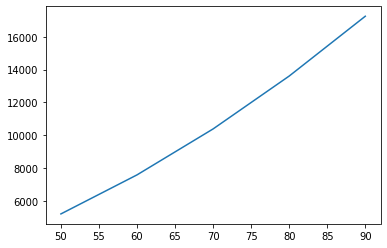

In [147]:
# a range of diffferent prices to find the optimum one
Price = [50, 60, 70, 80,90]
# assuming a fixed cost
cost = 12
Revenue = []
for i in Price:
  quantity_demanded = model.params['Intercept'] - model.params['Price'] * i 
  # profit function
  Revenue.append((i-cost) * quantity_demanded)
# create data frame of price and revenue
profit = pd.DataFrame({"Price": Price, "Revenue": Revenue})
#plot revenue against price
plt.plot(profit["Price"], profit["Revenue"])

In [148]:
profit.iloc[profit['Revenue'].idxmax()]

Price         90.000000
Revenue    17249.387493
Name: 4, dtype: float64

In [149]:
model.params['Price']

-2.1109052626806184

In [ ]:
data.Price[0]

#oprek

In [ ]:
for data in data_product['data_22485']:
  # fit OLS model
  model = ols("Quantity ~ Price", data).fit()
  # asal.append([item.replace('data_', ''), model.params['Intercept'], model.params['Price'], data.Price.min(), data.Price.max()])
# print model summary
  print(item.replace('data_', ''), model.params['Intercept'], model.params['Price'], data.Price.min(), data.Price.max())

In [ ]:
# fit OLS model fix 1 cobain
# data_all = {}
data_coef = []
for item, data in data_product.items():
  # data_product['data_22485'].take([0])
  simpan_unik = data_product[item].Price.unique()
  model = ols("Quantity ~ Price", data=data_product[item]).fit() 
  # print model summary
  no = data_product[item]
  data_coef.append([item.replace('data_', ''), model.params['Intercept'], model.params['Price'], no.Price.min(), no.Price.max()])
  # for data in data_product[item]:
data_coef = pd.DataFrame(data_coef, columns=["ProductNo","Intercept_Coef","Elasticity_Coef","Min_Price","Max_Price"])
# data_coef = data_coef.drop_duplicates(subset=["Price"], keep="first")
# data_all.update({item:data_coef})
simpan = data_coef.to_json('export.json', orient='index')
print(simpan)


None


In [ ]:
# fit OLS model fix 1
# data_all = {}
data_coef = []
for item, data in data_product.items():
  # data_product['data_22485'].take([0])
  simpan_unik = data_product[item].Price.unique()
  model = ols("Quantity ~ Price", data=data_product[item]).fit()
  for i in range (len(data_product[item])):
    
  # print model summary
    no = data_product[item]
    harga = data_product[item]['Price'].iat[i]
  
  data_coef.append([item.replace('data_', ''), model.params['Intercept'], model.params['Price'], no.Price.min(), no.Price.max()])
  # for data in data_product[item]:
data_coef = pd.DataFrame(data_coef, columns=["ProductNo","Intercept_Coef","Elasticity_Coef","Min_Price","Max_Price"])
# data_coef = data_coef.drop_duplicates(subset=["Price"], keep="first")
# data_all.update({item:data_coef})
simpan = data_coef.to_json('export.json', orient='index')
print(simpan)


In [ ]:
#initialize Dataframe
df_output = pd.DataFrame({
    'ProductNo':[pd.DataFrame({
                 'Intercept_Coef':[],
                 'Elasticity_Coef':[],
                 'Initial_MinPrice':[],
                 'Initial_MaxPrice':[]
    })],
})

In [ ]:
# fit OLS model
i=0
for item, data in data_product.items():
  # fit OLS model
  model = ols("Quantity ~ Price", data.take([i])).fit()
# print model summary
  print(data.ProductNo[i], model.params['Intercept'], model.params['Price'])
  i=i+1

In [ ]:
model = ols("Quantity ~ Price", data=data_product['data_22485']).fit()
# print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     8.039
Date:                Wed, 15 Jun 2022   Prob (F-statistic):            0.00503
Time:                        17:45:41   Log-Likelihood:                -488.84
No. Observations:                 208   AIC:                             981.7
Df Residuals:                     206   BIC:                             988.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3961      0.682      6.447      0.0

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


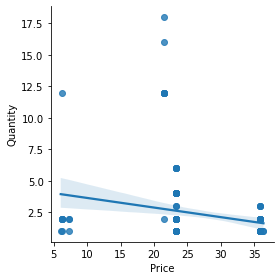

In [ ]:
# for item, data in data_product['data_22485']:
sns.lmplot(x = "Price", y = "Quantity", 
data = data_product['data_22485'], fit_reg = True, size = 4)

In [ ]:
for item, data in data_product.items():
  df_output=df_output.append({
    'ProductNo':item.replace('data_', ''),
  }, ignore_index=True)

In [ ]:
# fit OLS model
for item, data in data_product.items():
  # fit OLS model
  model = ols("Quantity ~ Price", data).fit()
# print model summary
  print(item.replace('data_', ''), model.params['Intercept'], model.params['Price'], data.Price.min(), data.Price.max())
# append to dataframe output
  dataku = item.replace('data_', '')
  df_output=df_output.append({
          'Intercept_Coef':model.params['Intercept'],
          'Elasticity_Coef':model.params['Price'],
          'Initial_MinPrice':data.Price.min(),
          'Initial_MaxPrice':data.Price.max(),    
  }, ignore_index=True)
  simpan = df_output.to_json('export.json', orient='index')
  print(simpan)


In [ ]:
# fit OLS model fix cadangan
# data_all = {}
harga_unik = []
for item, data in data_product.items():
  # data_product['data_22485'].take([0])
  simpan_unik = data_product[item].Price.unique()
  
  for i in range (len(data_product[item])):
    model = ols("Quantity ~ Price", data_product[item].take([i])).fit()
  # print model summary
    no = data_product[item]
    harga = data_product[item]['Price'].iat[i]
    harga_unik.append([item.replace('data_', ''), model.params['Intercept'], model.params['Price'], harga, no.Price.min(), no.Price.max()])
  # for data in data_product[item]:
harga_unik = pd.DataFrame(harga_unik, columns=["ProductNo","Intercept_Coef","Elasticity_Coef","Price","Min_Price","Max_Price"])
harga_unik = harga_unik.drop_duplicates(subset=["Price"], keep="first")
# data_all.update({item:harga_unik})
# simpan = harga_unik.to_json('export.json', orient='index')
# print(simpan)


In [ ]:
# a range of diffferent prices to find the optimum one
Price = [320, 330, 340, 350, 360, 370, 380, 390]
i=0

# assuming a fixed cost
cost = 350

for item, data in data_product.items():
  Revenue = []
  for i in Price:
    quantity_demanded = model.params['Intercept'] - model.params['Price'] * i
    
    # profit function
    Revenue.append((i-cost) * quantity_demanded)
  # create data frame of price and revenue
  profit = pd.DataFrame({"Price": Price, "Revenue": Revenue})
  #plot revenue against price
  plt.plot(profit["Price"], profit["Revenue"])
  i=i+1

In [ ]:
for item, data in data_product.items():
  min_price = data.Price.min()
  max_price = data.Price.max()
  print(min_price, max_price)
  print(list(number_range(min_price, max_price, 10)))

In [ ]:
# for item in hasil_profit.count():
#   max_profit = item
#   print(item)
print(hasil_profit.count)

<built-in method count of list object at 0x7facc0ccb8c0>


In [111]:
# a range of diffferent prices to find the optimum one
# hasil_profit = []
# simpan_profit = []
#initialize Dataframe
simpan_profit = pd.DataFrame({
    'max_profit':[],
    'max_price_profit':[],
})
# for item, data in data_product.items():
for item, data in data_product.items():
  min_price = data.Price.min()
  max_price = data.Price.max()
  Price = []
  Price = list(number_range(min_price, max_price, 10))
  Revenue = []
  # assuming a fixed cost
  cost = 20/100*min_price
  model = ols("Quantity ~ Price", data=data_product[item]).fit()
  for i in Price:
   quantity_demanded = model.params['Intercept'] - model.params['Price'] * i
   # profit function
   Revenue.append((i-cost) * quantity_demanded)
  # create data frame of price and revenue
  profit = pd.DataFrame({"Price": Price, "Revenue": Revenue})
  #plot revenue against price
  # plt.plot(profit["Price"], profit["Revenue"])
  # for i in range (len(profit.iloc[profit['Revenue'].idxmax()])):
  simpan_profit=simpan_profit.append({
      'max_profit':round(profit.Revenue.max(),2),    
      'max_price_profit':round(profit.Price.max(),2),    
  }, ignore_index=True)
  print(round(profit.iloc[profit['Revenue'].idxmax()],2))

Price       36.38
Revenue    252.19
Name: 10, dtype: float64
Price       13.27
Revenue    241.42
Name: 10, dtype: float64
Price       16.18
Revenue    235.97
Name: 10, dtype: float64
Price       13.62
Revenue    133.13
Name: 10, dtype: float64
Price       18.75
Revenue    178.11
Name: 10, dtype: float64
Price       13.69
Revenue    992.71
Name: 10, dtype: float64
Price       22.42
Revenue    172.85
Name: 10, dtype: float64
Price       24.73
Revenue    346.34
Name: 10, dtype: float64
Price       12.82
Revenue    577.87
Name: 10, dtype: float64
Price       11.95
Revenue    604.72
Name: 10, dtype: float64


45.38182674947934
tidak
68.61955054133156
tidak
69.71317137555668
berhasil
48.66268925215465
tidak
5.468104171125621
tidak


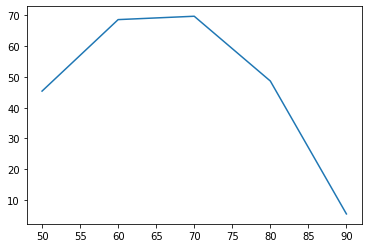

In [99]:
# coba
#initialize Dataframe
simpan_profit = pd.DataFrame({
    'max_profit':[],
    'max_price_profit':[],
})
Price = [50, 60, 70, 80,90]
# assuming a fixed cost
cost = 40
Revenue = []
for i in Price:
  quantity_demanded = model.params['Intercept'] - model.params['Price'] * i 
  # profit function
  Revenue.append((i-cost) * quantity_demanded)
# create data frame of price and revenue
profit = pd.DataFrame({"Price": Price, "Revenue": Revenue})
#plot revenue against price
d = 0
for data in profit.Revenue.items():
  print(data[1])
  if(profit.Revenue.max() == data[1]):
    simpan_profit=simpan_profit.append({
        'max_profit':round(profit.Revenue.max(),2),    
        'max_price_profit':round(profit.Price[d],2),    
    }, ignore_index=True)
    print("berhasil")
  else:
    print("tidak")
  d=d+1


plt.plot(profit["Price"], profit["Revenue"])